## Bagging ensembles
![grape](https://user-images.githubusercontent.com/12748752/126882595-d1f5449e-14bb-4ab3-809c-292caf0858a1.png)


### Data : `Make Moon`
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Libraries
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

### Bootstrap Aggregating Classifier
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)
> * The following code trains an ensemble of 500 Decision Tree classifiers(***`n_estimators=500`***)
> * Each is trained on 100 training instances randomly sampled(***`max_samples=100`***)
> * From the training set with ***replacement*** (this is an example of **bagging**, but if you want to use **pasting** instead, just set ***`bootstrap=False`***). 
> * The ***`n_jobs`*** parameter tells Scikit-Learn the number of CPU cores to use for training and predictions (***–1*** tells Scikit-Learn to use **all available CPU cores**): 

> #### Note: 
> * The ***`BaggingClassifier`*** automatically performs `soft voting` instead of `hard voting` if the base classifier can estimate class probabilities (i.e., if it has a `predict_proba()` method), which is the case with Decision Tree classifiers.

In [3]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [5]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


### Out-of-Bag Evaluation
![plum](https://user-images.githubusercontent.com/12748752/126882596-b9ba4645-7001-435e-9a3c-d4416a2543c1.png)
* With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. 
* This means that only about 63% of the training instances are sampled on average for each predictor. 
* The remaining 37% of the training instances that are not sampled are called `out-of-bag (oob) instances`.
* Since a predictor never sees the oob instances during training, it can be evaluated on these instances, without the need for a separate validation set.
* In Scikit-Learn, you can set `oob_score=True` when creating a `BaggingClassifier` to request an automatic `oob` evaluation after training.


In [9]:
bag_clf = BaggingClassifier(
     DecisionTreeClassifier(), n_estimators=500,
     bootstrap=True, n_jobs=-1, oob_score=True)


bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [10]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

In [6]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

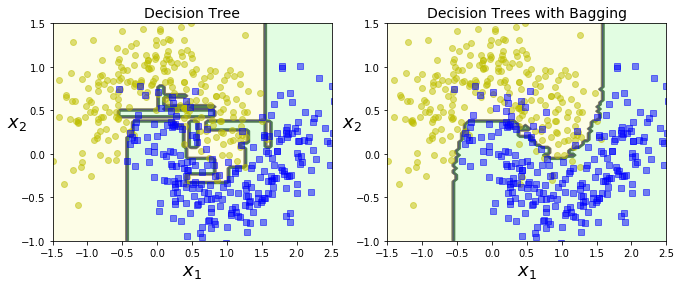

In [7]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
#save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()